<h1 style="text-align: center; color: blue;">Machine Learning Project</h1>
<h2 style="text-align: center; color: green;">Prabal Ghosh</h2>

<p style="text-align: center; color: blue;">MSc Data Science & Artificial Intelligence</p>
<p style="text-align: center; color: blue;">Université Côte d'Azur</p>

<p style="text-align: center; color: blue;">Machine Learning</p>
<p style="text-align: center; color: orange;">Date- 16/12/2023</p>
_______________________________________________________________________________________________________________________________


# Context: Climate Change and Building Energy Efficiency

Climate change stands as an urgent, multifaceted global issue significantly impacting energy policy and infrastructure. Addressing climate change involves both mitigation (reducing greenhouse gas emissions) and adaptation (preparing for inevitable consequences). Mitigation efforts require changes across electricity systems, transportation, buildings, industries, and land use.

According to a report by the International Energy Agency (IEA), the life cycle of buildings, from construction to demolition, accounted for 37% of global CO2 emissions associated with energy and processes in 2020. However, there exists substantial potential to decrease buildings' energy consumption by integrating easily implementable solutions with cutting-edge strategies.

For instance, renovated buildings have shown the capability to reduce heating and cooling energy needs by 50-90%. Moreover, many of these energy efficiency measures yield overall cost savings and additional benefits, such as providing occupants with cleaner air. Achieving this potential is viable while upholding the services offered by the buildings.


## The Dataset and Challenge

Accurate predictions of energy consumption for a building based on its characteristics are crucial for policymakers to effectively target renovation efforts and maximize emissions reductions.

The dataset utilized originates from the Lawrence Berkeley National Laboratory (Berkeley Lab). The task at hand involves analyzing variations in building energy efficiency to construct one or more predictive models for estimating the energy consumption of buildings.

The provided data encompasses descriptions of building characteristics along with climatic and meteorological variables specific to the regions where these buildings are situated.


## Dataset Description

The dataset comprises around 100k observations gathered over a span of 7 years across various locations, focusing on building energy usage.

It encompasses:
- Building characteristics (e.g., floor area, installation type, etc.).
- Meteorological data specific to each building's location (e.g., mean annual temperature, total annual precipitation, etc.).
- Energy consumption details for each building within a given year.

Each row in the dataset corresponds to a singular building observed in a particular year.

Your objective is to predict the Site Energy Use Intensity (EUI) for each row, leveraging the building characteristics and the meteorological data associated with the building's location.

**Evaluation Metrics: Negative Root Mean Square Error**


## Features

- **id:** Building ID
- **Year_Factor:** Anonymized year when weather and energy usage factors were observed
- **State_Factor:** Anonymized state in which the building is located
- **building_class:** Building classification
- **facility_type:** Building usage type
- **floor_area:** Floor area (in square feet) of the building
- **year_built:** Year in which the building was constructed
- **energy_star_rating:** The Energy Star rating of the building
- **ELEVATION:** Elevation of the building location
- **january_min_temp:** Minimum temperature in January (in Fahrenheit) at the location of the building
- **january_avg_temp:** Average temperature in January (in Fahrenheit) at the location of the building
- **january_max_temp:** Maximum temperature in January (in Fahrenheit) at the location of the building
- **cooling_degree_days:** Cooling degree day for a given day, representing the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. The monthly sum produces an annual total at the building's location.
- **heating_degree_days:** Heating degree day for a given day, representing the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. The monthly sum produces an annual total at the building's location.
- **precipitation_inches:** Annual precipitation in inches at the location of the building
- **snowfall_inches:** Annual snowfall in inches at the location of the building
- **snowdepth_inches:** Annual snow depth in inches at the location of the building
- **avg_temp:** Average temperature over a year at the location of the building
- **days_below_30F:** Total number of days below 30 degrees Fahrenheit at the location of the building
- **days_below_20F:** Total number of days below 20 degrees Fahrenheit at the location of the building
- **days_below_10F:** Total number of days below 10 degrees Fahrenheit at the location of the building
- **days_below_0F:** Total number of days below 0 degrees Fahrenheit at the location of the building
- **days_above_80F:** Total number of days above 80 degrees Fahrenheit at the location of the building
- **days_above_90F:** Total number of days above 90 degrees Fahrenheit at the location of the building
- **days_above_100F:** Total number of days above 100 degrees Fahrenheit at the location of the building
- **days_above_110F:** Total number of days above 110 degrees Fahrenheit at the location of the building
- **direction_max_wind_speed:** Wind direction for maximum wind speed at the location of the building, given in 360-degree compass point directions (e.g., 360 = north, 180 = south, etc.).
- **direction_peak_wind_speed:** Wind direction for peak wind gust speed at the location of the building, given in 360-degree compass point directions (e.g., 360 = north, 180 = south, etc.).
- **max_wind_speed:** Maximum wind speed at the location of the building
- **days_with_fog:** Number of days with fog at the location of the building


# Target

- **site_eui:** Site Energy Usage Intensity is the amount of heat and electricity consumed by a building as reflected in utility bills.


# Your Job

Your task involves demonstrating your knowledge gained from the machine learning course by constructing an sklearn pipeline to perform the following:

1. **Data Pre-processing:**
   - Correctly pre-process the data based on its category. The specific steps for data pre-processing are not provided here as they are covered in various courses.
   
2. **Hyper-parameter Tuning:**
   - Choose appropriate hyper-parameters for the selected models. While the specific hyper-parameters are not mentioned here (as they have been covered in the course), your task involves identifying and tuning the right hyper-parameters for the models.
   
An initial Exploratory Data Analysis (EDA) is crucial to understand the nature of each feature within the dataset.

**CAUTION:** 
- Utilize only the concepts learned in the course. If you include any additional concepts, ensure you understand and can explain them thoroughly.
- Avoid blindly copying code from the internet or generated by ChatGPT without comprehension. It's better to have a concise and fully understood piece of work rather than an extensive application of techniques without understanding their functionality or usefulness.

You'll need to present a written notebook (with comments) that justifies your choices for different stages of the pipeline.


<h1 style="text-align: center; color: green;">Solution</h1>
_______________________________________________________________________________________________________________________________

**I referred this book for data preprocessing-** 
[Click here to download data preprocessing book](https://drive.google.com/file/d/1SKN6sB9YxupNVoMOICX1Gsc-lPL5dnvL/view?usp=sharing)


## Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

In [2]:
import sklearn
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from sklearn.metrics import mean_squared_error

from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [3]:
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso,LassoCV,ElasticNet
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score


## Dataset

In [4]:
energy_df = pd.read_csv("C:\\Users\\praba\\Desktop\\uca1\\M1\\ML\\final project\\data.csv\data.csv")
energy_df.tail(5)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
75752,6,State_11,Commercial,Office_Uncategorized,20410.0,1995.0,8.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,State_11,Residential,5plus_Unit_Building,40489.0,1910.0,98.0,36.6,28,43.451613,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,State_11,Commercial,Commercial_Other,28072.0,1917.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,...,16,0,0,0,NaN,NaN,NaN,NaN,29.154684,75756


In [5]:
energy_df.shape

(75757, 64)

In [6]:
'''All id values are unique which are irrelavent for model training'''
energy_df['id'].unique().shape

(75757,)

In [7]:
energy_df['Year_Factor'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

**There are a total of six different values for the 'Year_Factor' feature in this dataset. Therefore, I will use one-hot encoding for these values, considering them as distinct levels or categorical entries.**

## Checking NAN data

In [8]:
energy_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [9]:
'''Nan value is present in the dataset'''
energy_df.isnull().any().any()

True

In [10]:
# a = energy_df_id.isna().sum()
# for i in a:
#     if i !=0:
#         print(i)

In [11]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [12]:
# energy_df_id.isna().sum()

In [13]:
'''Get the features with their corresponding total number of missing values.'''
missing_columns = len(energy_df) - energy_df.loc[:, np.sum(energy_df.isnull())>0].count()
missing_columns

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

### heatmap plot to see the null values in dataset


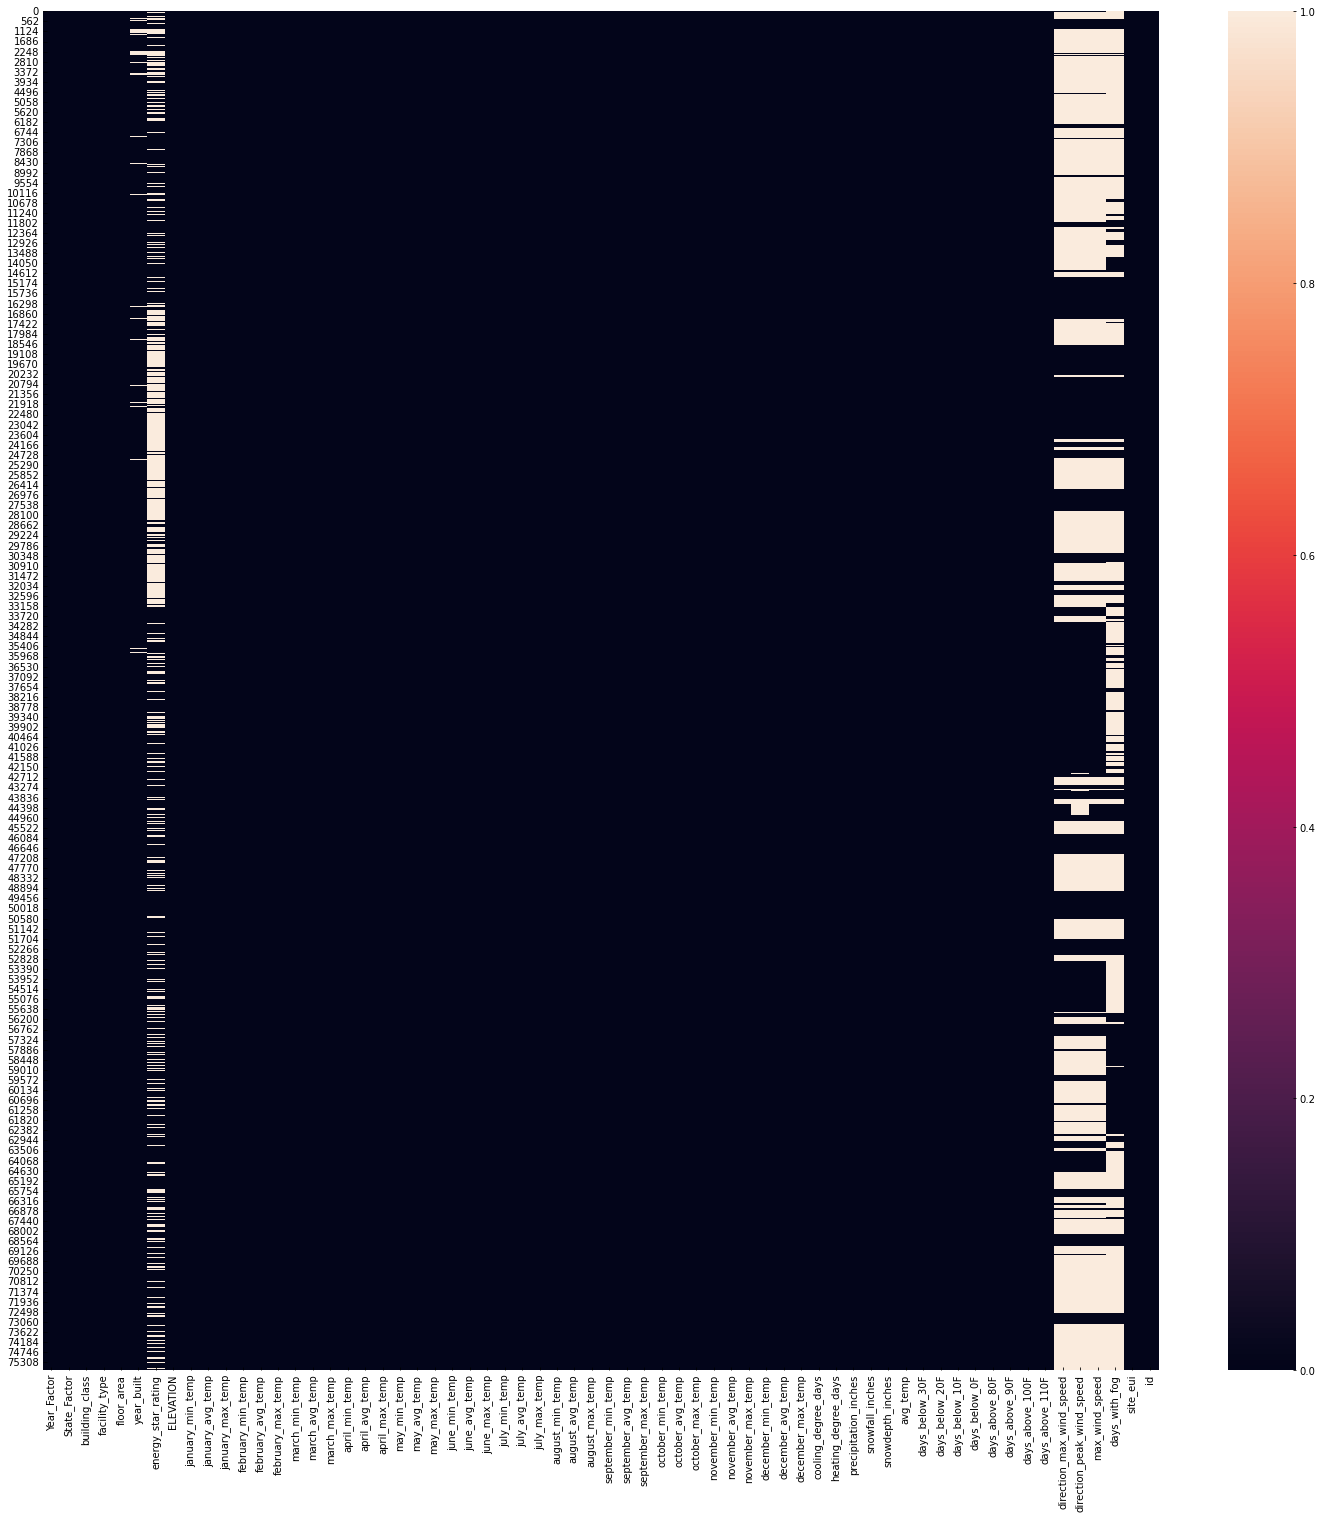

In [14]:
'''heatmap plot to see the null values in dataset'''

plt.figure(figsize=(25,25)) 
sns.heatmap(energy_df.isnull()) 
plt.show()

#### Columns with Null Values

The following six columns contain null values:

- year_built
- energy_star_rating
- direction_max_wind_speed
- direction_peak_wind_speed
- max_wind_speed
- days_with_fog


### Dropping Columns with Null Values exceeding 40,000 instances

Upon inspecting the dataset, it was found that the following columns: **'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', and 'days_with_fog'** contain a substantial number of null values, each exceeding 40,000 instances, which represents more than 50% of the data in these columns.

Therefore, due to the significant presence of missing values, I have decided to drop these columns from the dataset. This step ensures a more robust and accurate analysis by excluding columns with inadequate or unreliable data.


In [15]:
'''All id values are unique which are irrelavent for model training. Thats why I am removing "id" column'''

energy_df= energy_df.loc[:, energy_df.columns != "id"]
# energy_df.head(3)

In [16]:
"""'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', and 'days_with_fog' These columns are removed"""

energy_df.drop(['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog'],inplace=True, axis=1)


In [17]:
energy_df.shape

(75757, 59)

**Null values in 'year_built' column was just approx 1% of the whole data so i will fill those using mean**

In [18]:
energy_df["year_built"].isna().sum()

1837

In [19]:
# energy_df['year_built'].mode()

In [20]:
# np.mean(energy_df['year_built'])

In [21]:
# energy_df.dropna(subset=['year_built'], inplace=True, axis=0)
# energy_df.shape

In [22]:
# Fill NaN values in a specific column with the mean
mean_value_year = energy_df['year_built'].mean()
energy_df['year_built'].fillna(mean_value_year, inplace=True)


In [23]:
'''Get the features (with missing values) and their corresponding missing values.'''
missing_columns = len(energy_df) - energy_df.loc[:, np.sum(energy_df.isnull())>0].count()
missing_columns

energy_star_rating    26709
dtype: int64

**In column "energy_star_rating" 25472 null values present. So I am filling those using the mean value of the column**

In [24]:
# Fill NaN values in a specific column with the mean
mean_value = energy_df['energy_star_rating'].mean()
energy_df['energy_star_rating'].fillna(mean_value, inplace=True)


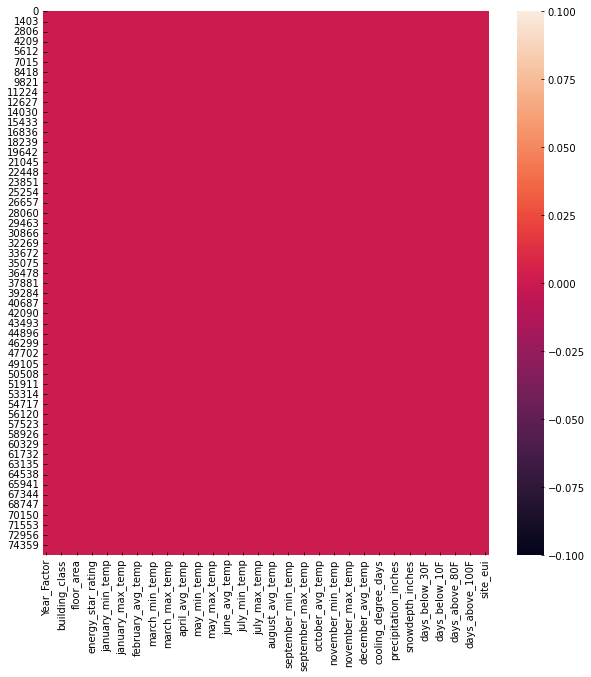

In [25]:
'''heatmap plot to see the null values in dataset=====>>>> Here no null value present we can see that from this plot'''

plt.figure(figsize=(10,10)) 
sns.heatmap(energy_df.isnull()) 
plt.show()

In [26]:
 """Now there is no nan value present in the dataset."""
energy_df.isnull().sum().sum()

0

In [27]:
# features = energy_df.columns.tolist()
# print("The columns in dataset:----=== ",features)
# type(features)


**There are a total of six different values for the 'Year_Factor' feature in this dataset. Therefore, I will use one-hot encoding for these values, considering them as distinct levels as categorical entries.**

In [28]:
'''Numerical and categorical columns are seperated and Year_Factor is choosen as categorical'''
import pandas as pd

features = energy_df.columns.tolist()

Num_features = [feature for feature in features if 
                energy_df[feature].dtype != 'object' and 
                feature != 'Year_Factor']
Cat_features = [feature for feature in features if
                energy_df[feature].dtype == object or feature == 'Year_Factor' ]


print("Num_features: \n",Num_features)
print("\n")

print("Cat_features: \n",Cat_features)


Num_features: 
 ['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'd

array([[<AxesSubplot:title={'center':'Year_Factor'}>,
        <AxesSubplot:title={'center':'floor_area'}>,
        <AxesSubplot:title={'center':'year_built'}>,
        <AxesSubplot:title={'center':'energy_star_rating'}>,
        <AxesSubplot:title={'center':'ELEVATION'}>,
        <AxesSubplot:title={'center':'january_min_temp'}>,
        <AxesSubplot:title={'center':'january_avg_temp'}>],
       [<AxesSubplot:title={'center':'january_max_temp'}>,
        <AxesSubplot:title={'center':'february_min_temp'}>,
        <AxesSubplot:title={'center':'february_avg_temp'}>,
        <AxesSubplot:title={'center':'february_max_temp'}>,
        <AxesSubplot:title={'center':'march_min_temp'}>,
        <AxesSubplot:title={'center':'march_avg_temp'}>,
        <AxesSubplot:title={'center':'march_max_temp'}>],
       [<AxesSubplot:title={'center':'april_min_temp'}>,
        <AxesSubplot:title={'center':'april_avg_temp'}>,
        <AxesSubplot:title={'center':'april_max_temp'}>,
        <AxesSubplot:title

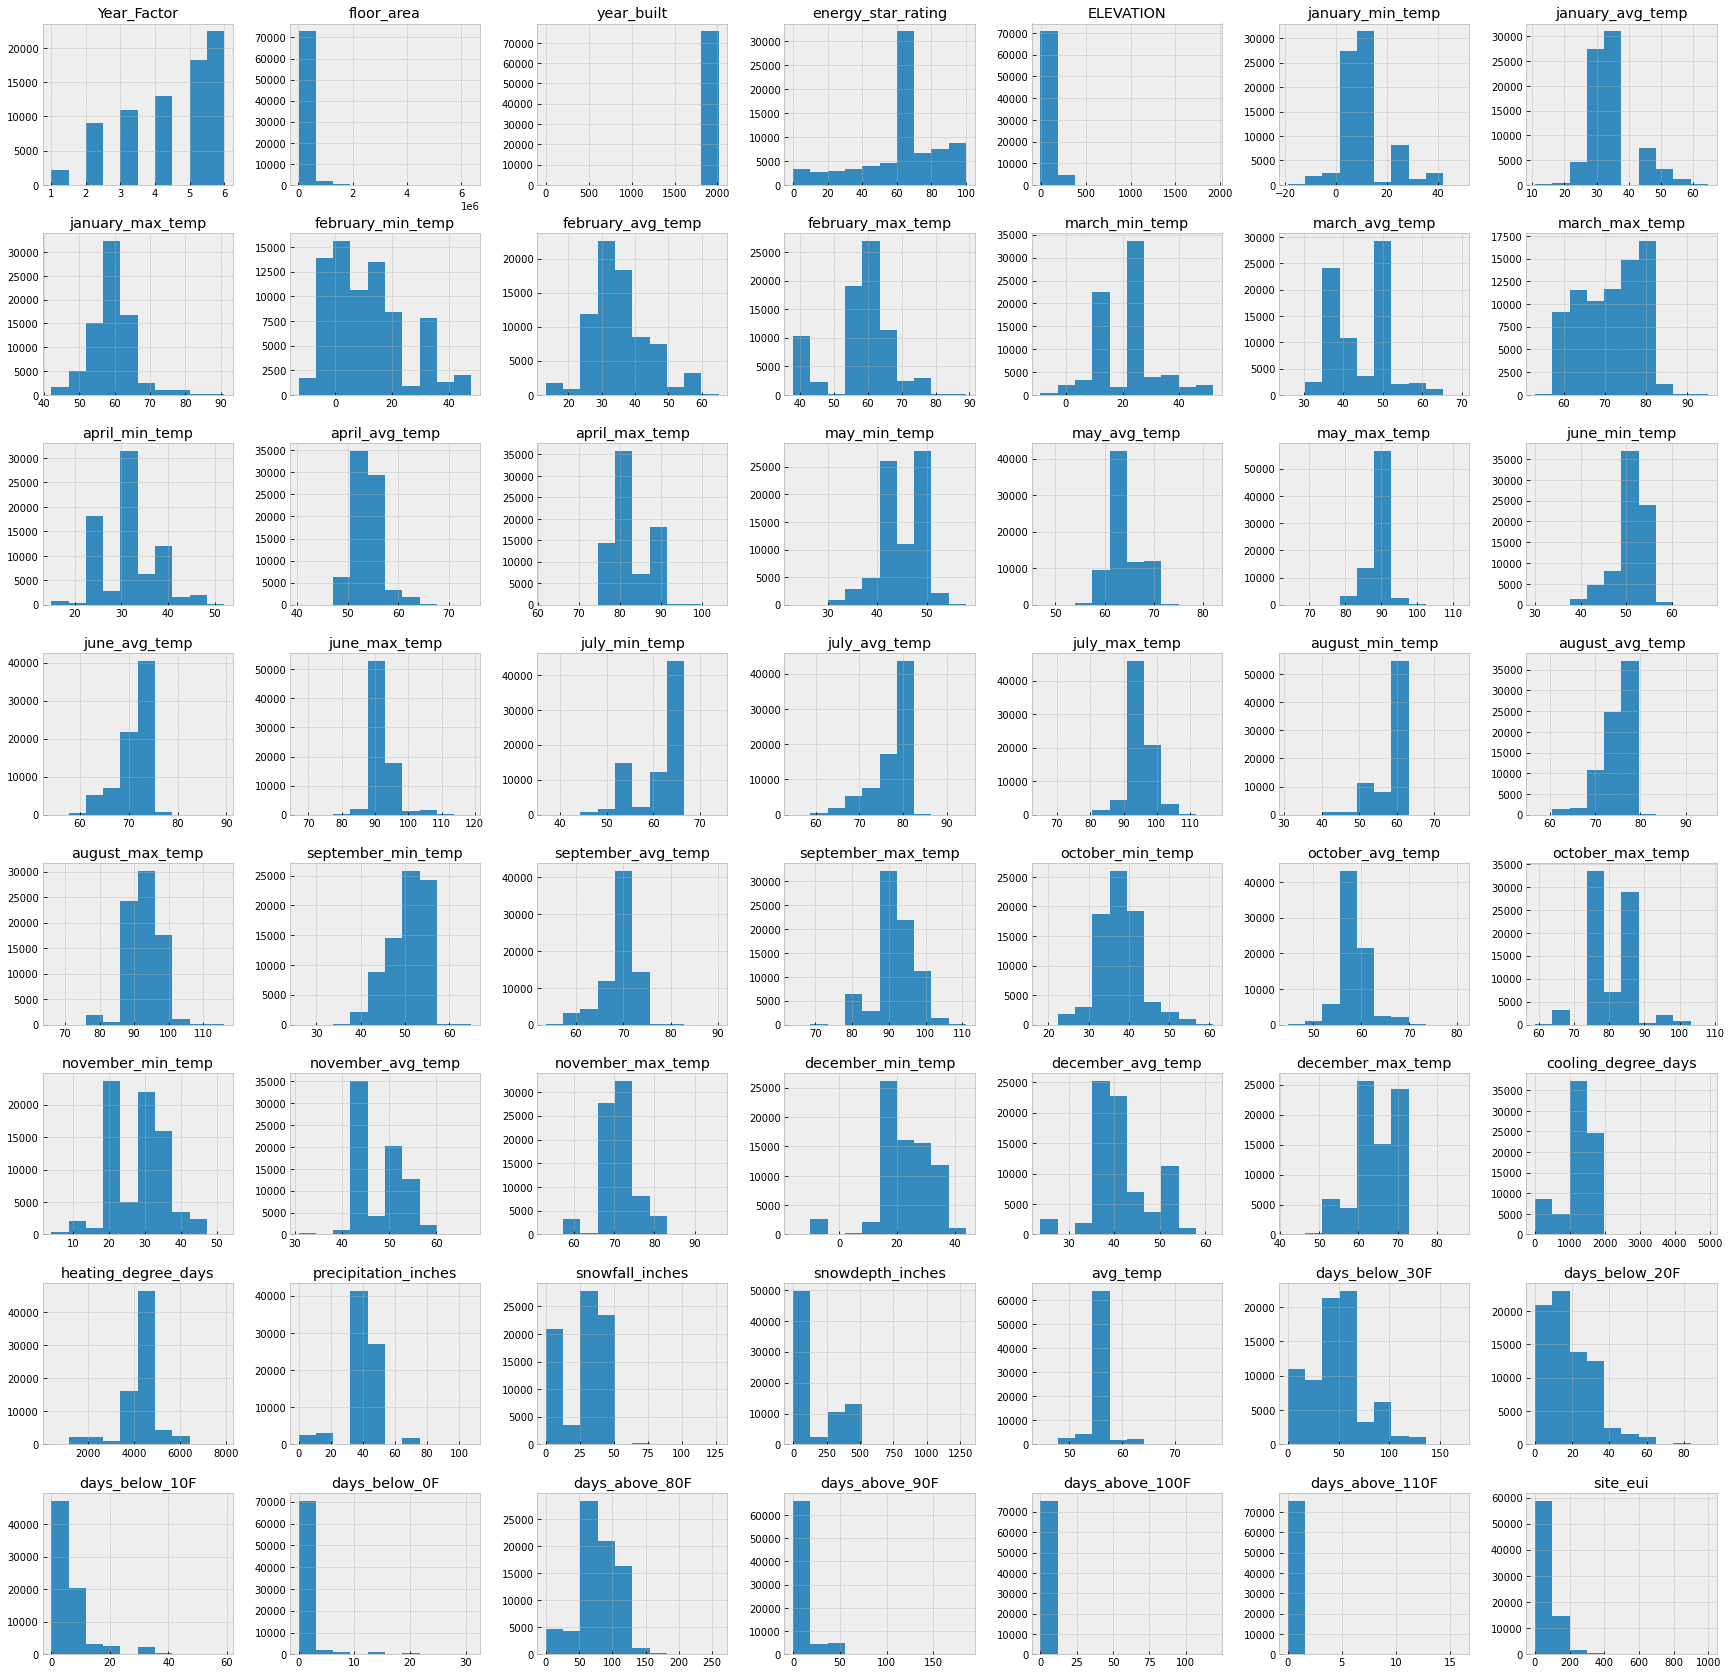

In [29]:
energy_df.hist(figsize=[30,30])

<!-- days_above_110F, days_above_100F, days_below_0F features are moslty contaline 0 value so I will remove these irrelavent columns -->

### **Boxplot to check outlaiers**

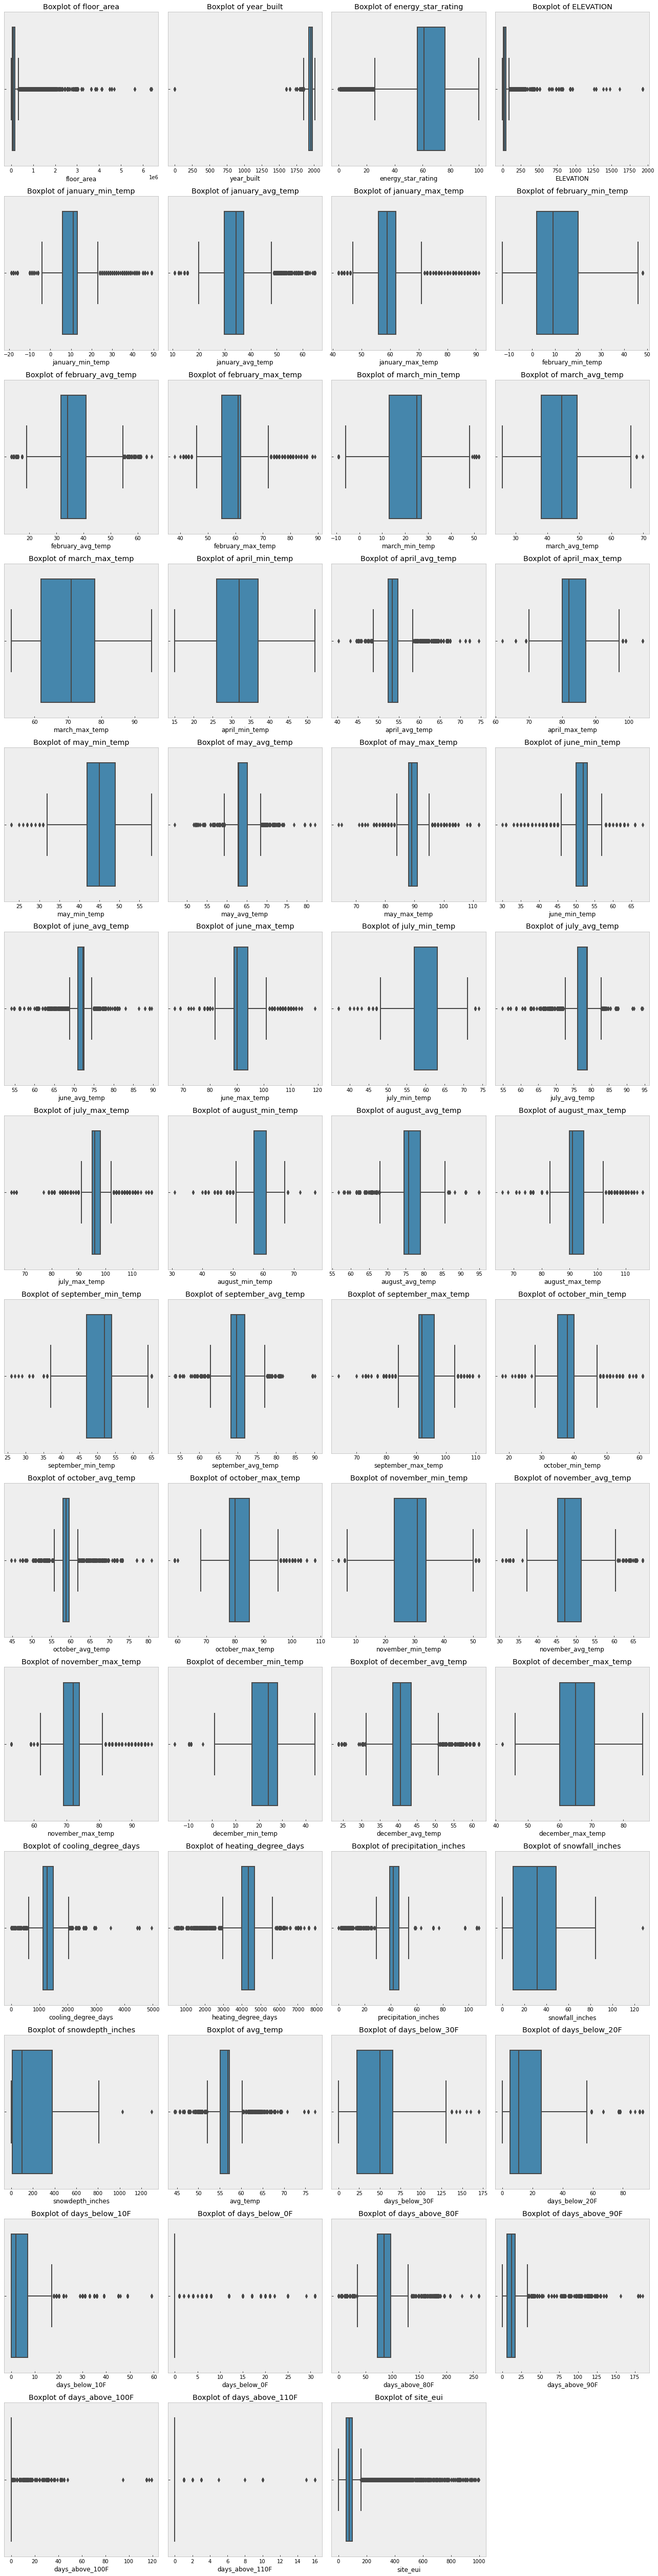

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

num_features_count = len(Num_features)
num_rows = math.ceil(num_features_count / 4)
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(18, 5*num_rows))

for i, column in enumerate(Num_features):
    row = i // 4
    col = i % 4
    sns.boxplot(x=energy_df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')
    axes[row, col].set_xlabel(column)

for i in range(num_features_count, num_rows * 4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


In [31]:
""" checking the number of outlaiers present for each feature using zscore"""
import numpy as np
import scipy.stats


for i in Num_features:
    print(i)
    z = np.abs(scipy.stats.zscore(energy_df[i]))
    outliers = energy_df[z > 3][i]
    print(outliers)


floor_area
56       1011213.0
93       1500000.0
95        937770.0
108      1325000.0
124       912400.0
           ...    
73574    1592914.0
73654     970647.0
73683     962428.0
73729    1765970.0
73775    2200000.0
Name: floor_area, Length: 1516, dtype: float64
year_built
353         0.0
955         0.0
2159        0.0
3415        0.0
4535        0.0
5571        0.0
6931     1789.0
8411     1789.0
9348     1829.0
9907     1789.0
15123    1600.0
16936    1836.0
19948    1600.0
24302    1649.0
26477    1827.0
26790    1836.0
26876    1600.0
27251    1649.0
35003    1827.0
35472    1600.0
35896    1649.0
44412    1827.0
44853    1836.0
44951    1600.0
55459    1827.0
55686    1800.0
56141    1836.0
56260    1600.0
56441    1811.0
56882    1649.0
57581    1833.0
59640    1800.0
61605    1799.0
64737    1841.0
65735    1818.0
65907    1756.0
66037    1800.0
66550    1818.0
66716    1756.0
66851    1800.0
67375    1818.0
67560    1756.0
67713    1800.0
68337    1732.0
68427    1815.0
68

### Dropping Columns Based on Box Plot Observations

Upon visual inspection using box plots, it's evident that the columns 'days_above_110F' and 'days_above_100F' and 'days_below_0F' predominantly contain zero values for most data points.

Therefore, considering the lack of variability and information in these columns, I have decided to drop both 'days_above_110F' and 'days_above_100F' and 'days_below_0F' from the dataset.


In [32]:
energy_df.drop(['days_above_110F', 'days_above_100F','days_below_0F'], axis=1, inplace=True)


In [33]:
energy_df.shape

(75757, 56)


**During the analysis, numerous outliers were detected across all features. However, the presence of a large number of outliers does not necessarily indicate their irrelevance.**

For this analysis, I have decided not to remove outliers as their presence might hold valuable information or characteristics within the dataset. Retaining outliers can contribute to a more comprehensive understanding of the data and potentially enhance the performance of the models.


In [34]:
import pandas as pd

# Assuming energy_df_id_remove_2 is your DataFrame and features is a list of column names
features = energy_df.columns.tolist()

Num_features = [feature for feature in features if 
                energy_df[feature].dtype != 'object' and 
                feature != 'Year_Factor']
Cat_features = [feature for feature in features if
                energy_df[feature].dtype == object or feature == 'Year_Factor' ]


print(Num_features)
print("\n")

print(Cat_features)


['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_above_80F', 'days_above_90F', 'site_eui']


['Year_Factor', 'Stat

### Correlation matrix to check highly correlated features

<AxesSubplot:>

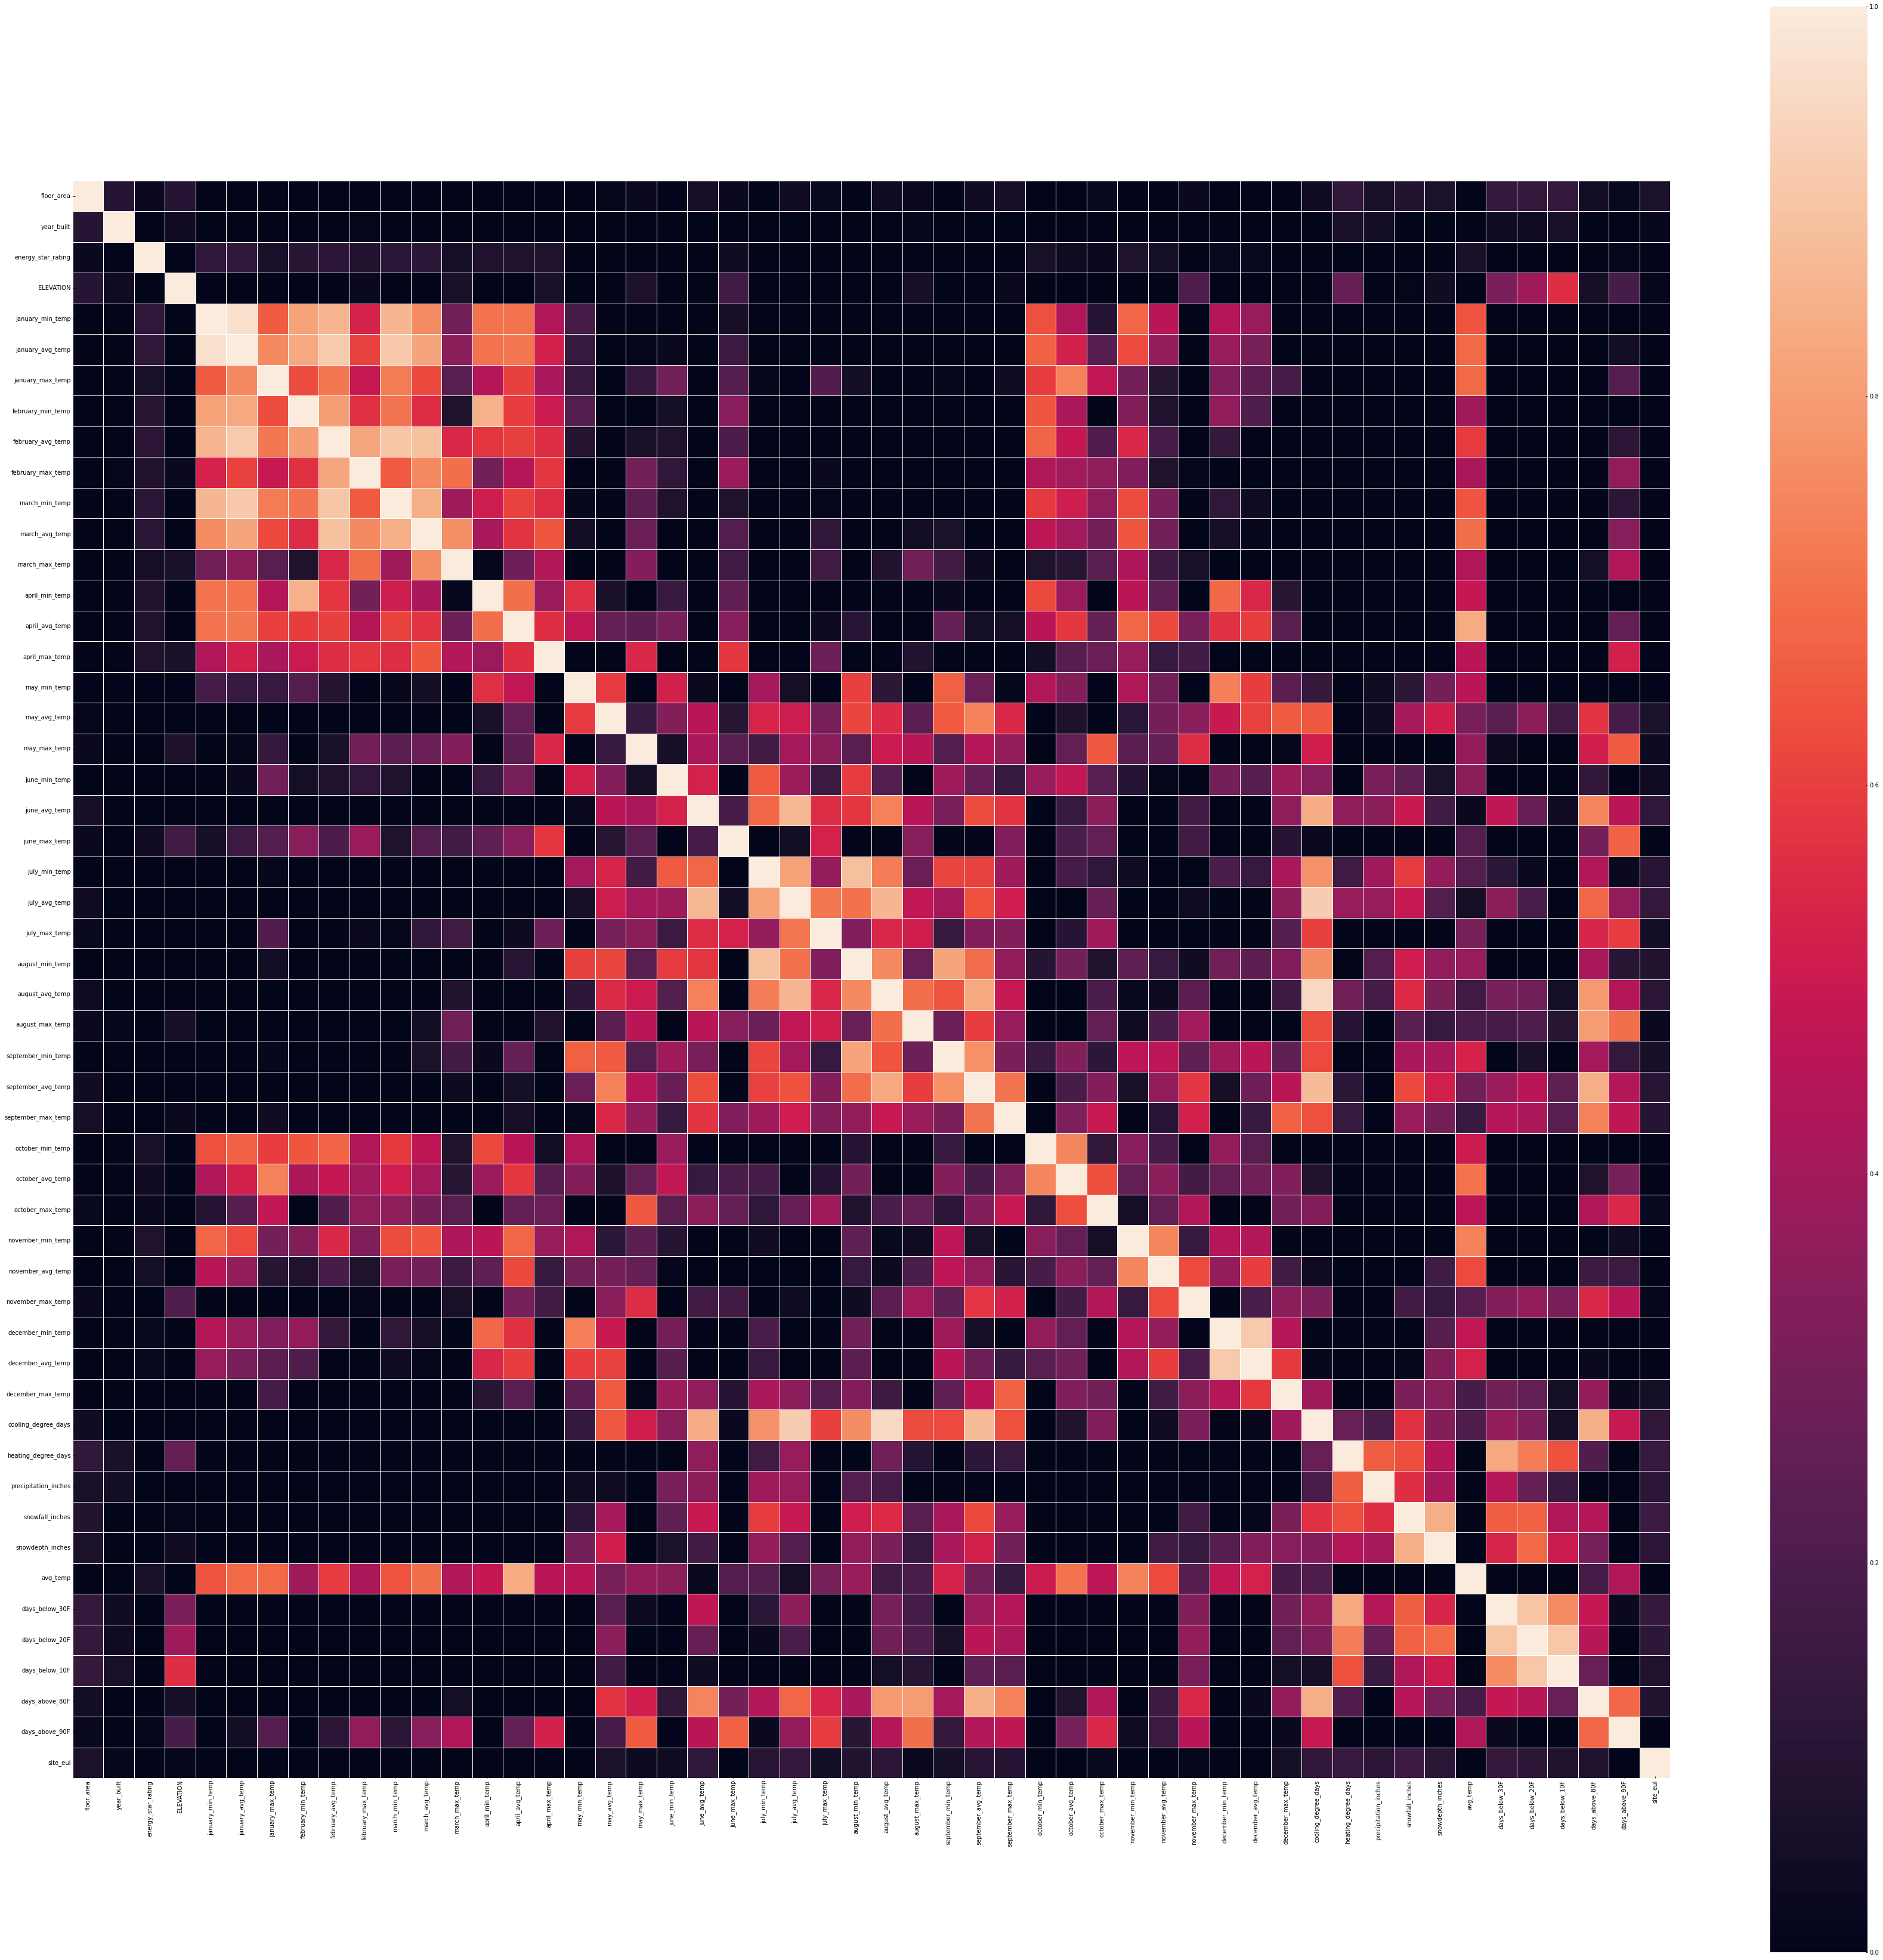

In [35]:
corr = energy_df[Num_features].corr()
plt.subplots(figsize=(60, 60))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)



**I will remove highly_correlated features( threshold = 0.9 )**

In [36]:
# Assuming 'corr' is the correlation matrix calculated from Num_features

threshold = 0.9  # Set your desired threshold for correlation

# Create a mask to focus only on the upper triangle of the correlation matrix (to avoid redundancy)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Find columns with correlation above the threshold
highly_correlated = set()
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if mask[i, j] and abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            highly_correlated.add(col_i)
#             highly_correlated.add(col_j)

print("Columns highly correlated:", highly_correlated)


Columns highly correlated: {'days_below_20F', 'december_min_temp', 'july_avg_temp', 'january_min_temp', 'january_avg_temp', 'february_avg_temp', 'august_avg_temp'}


In [37]:
len(highly_correlated)

7

In [38]:
"""There are 6 numerical features are highly correlated with other data"""
"""So I am removing those 6 columns """

energy_df.drop(highly_correlated, inplace=True, axis=1)

In [39]:
energy_df.shape

(75757, 49)

### Numerical features and Categorical features 

In [40]:
import pandas as pd

# Assuming energy_df_id_remove_2 is your DataFrame and features is a list of column names
features = energy_df.columns.tolist()

Num_features = [feature for feature in features if 
                energy_df[feature].dtype != 'object' and 
                feature != 'Year_Factor' and feature !='site_eui']
Cat_features = [feature for feature in features if
                energy_df[feature].dtype == object or feature == 'Year_Factor' ]


print(Num_features)
print("\n")

print(Cat_features)


['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_max_temp', 'february_min_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_max_temp', 'august_min_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_10F', 'days_above_80F', 'days_above_90F']


['Year_Factor', 'State_Factor', 'building_class', 'facility_type']


## Splitting the Data into Train and Test Data

In [41]:
X = energy_df.drop(['site_eui'],axis=1)
y = energy_df['site_eui']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape

((60605, 48), (15152, 48), (60605,), (15152,), (75757, 48), (75757,))

# Plot the decision tree 

### Data Preprocessing for Decision Tree regressor

For the decision tree Regressor model:

1. **Normalization:** Decision trees do not require normalization as they are not sensitive to the scale of numerical features. Hence, normalization is not necessary for this model.

2. **One-Hot Encoding:** Categorical features need to be one-hot encoded as decision trees typically require categorical variables to be converted into a numerical format for processing.

Therefore, before fitting the data into the decision tree model:
- Apply one-hot encoding to categorical features.
- No need to perform normalization on numerical features.


In [43]:
full_pipeline_1 = ColumnTransformer([
#     ('StandardScale', StandardScaler(), Num_features),
    ('onehot', OneHotEncoder(), Cat_features)
],remainder='passthrough')



In [44]:
pipe1= Pipeline(steps=[('full_pipeline_1',full_pipeline_1),
                        ])


In [45]:
X_train_transformed = pipe1.fit_transform(X_train)

In [46]:
X_test_transformed = pipe1.transform(X_test)

In [47]:
# X_train_transformed

In [48]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree


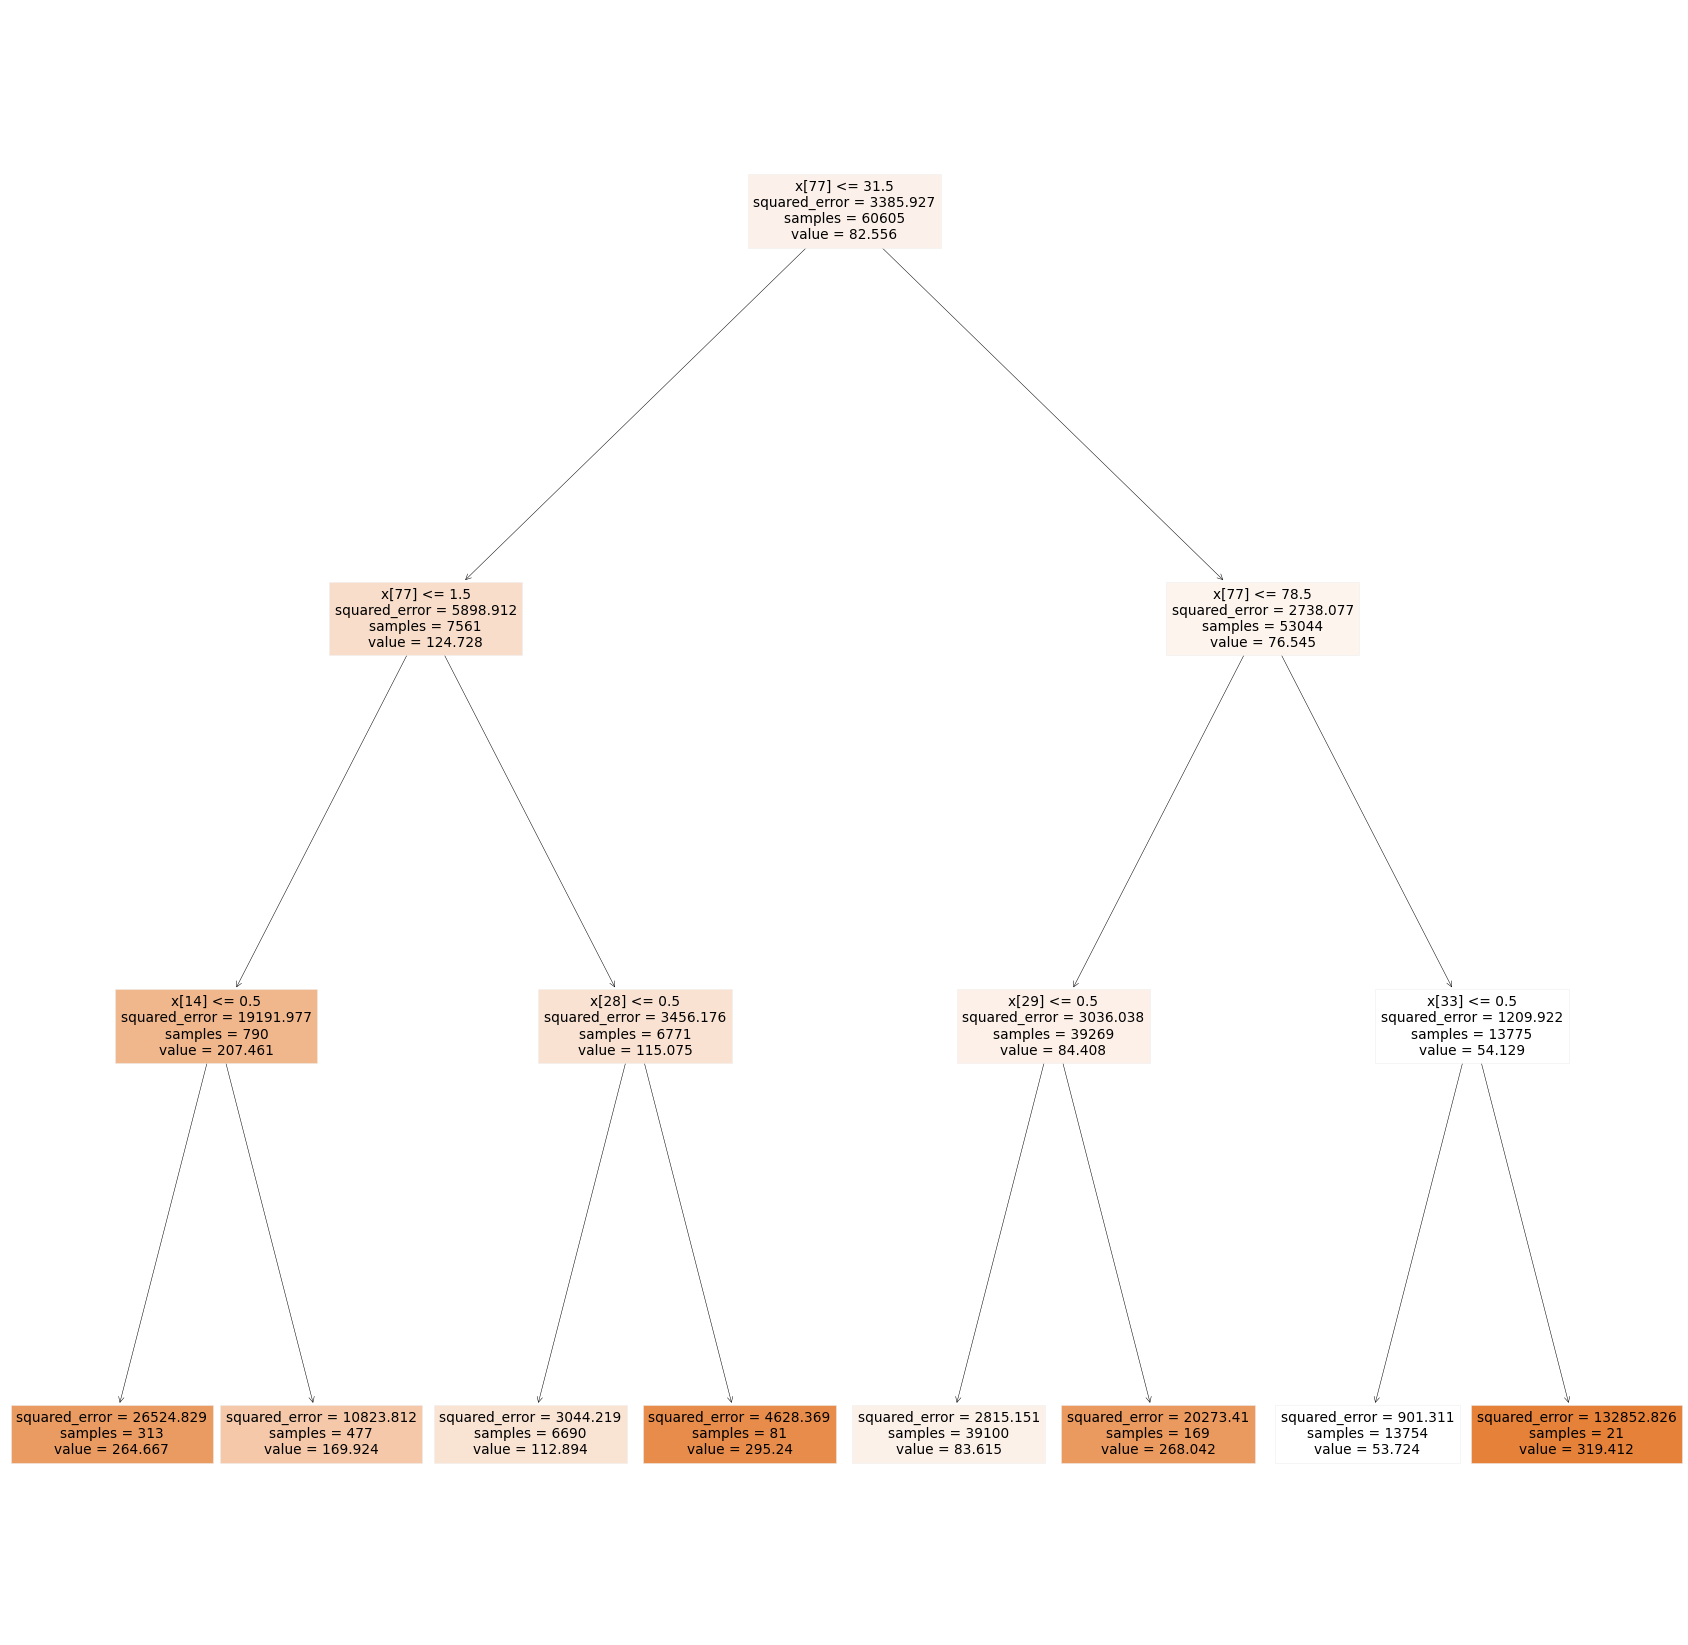

In [49]:
from sklearn.tree import DecisionTreeRegressor, plot_tree  # Add plot_tree import
import matplotlib.pyplot as plt  

def train_using_entropy(X_train, y_train): 
    # Decision tree with entropy 
    clf_entropy = DecisionTreeRegressor(max_depth=3, criterion='squared_error') 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    
    plt.figure(figsize=(30, 30))
    plot_tree(clf_entropy, filled=True)  # Use plot_tree from sklearn.tree
    plt.show()
    
    return clf_entropy


clf_object = train_using_entropy(X_train_transformed, y_train)

**Here for this Decision tree i have used depth as 3 just to visulize the tree. But for proper data prediction I should choose much higher depth value othervise predcition will be not properly correct**

In [50]:
def prediction(X_test, clf_object): 
  
    y_pred = clf_object.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 



In [51]:
y_pred_entropy = prediction(X_test_transformed, clf_object) 


Mean Squared Error: 2764.9598676970622
Predicted values:
[83.6145246  53.72382701 83.6145246  ... 83.6145246  83.6145246
 53.72382701]


# Plot the PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used to reduce the number of features (variables) while retaining the most important information or patterns present in the original dataset.

**Normalizing the data and handling categorical features are important steps before applying PCA.**

In [52]:
full_pipeline_2 = ColumnTransformer([
    ('StandardScale', StandardScaler(), Num_features),
    ('onehot', OneHotEncoder(), Cat_features),
    
])

In [53]:
pipe2= Pipeline(steps=[('full_pipeline_2',full_pipeline_2),
# ('pca' , PCA(n_components=0.90, svd_solver='full'))
                       
                        ])


In [54]:
pipe2

Pipeline(steps=[('full_pipeline_2',
                 ColumnTransformer(transformers=[('StandardScale',
                                                  StandardScaler(),
                                                  ['floor_area', 'year_built',
                                                   'energy_star_rating',
                                                   'ELEVATION',
                                                   'january_max_temp',
                                                   'february_min_temp',
                                                   'february_max_temp',
                                                   'march_min_temp',
                                                   'march_avg_temp',
                                                   'march_max_temp',
                                                   'april_min_temp',
                                                   'april_avg_temp',
                                                   'april_max_temp',
                                                   'may_min_temp',
                                                   'may_avg_temp...
                                                   'june_min_temp',
                                                   'june_avg_temp',
                                                   'june_max_temp',
                                                   'july_min_temp',
                                                   'july_max_temp',
                                                   'august_min_temp',
                                                   'august_max_temp',
                                                   'september_min_temp',
                                                   'september_avg_temp',
                                                   'september_max_temp',
                                                   'october_min_temp',
                                                   'october_avg_temp',
                                                   'october_max_temp',
                                                   'november_min_temp', ...]),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Year_Factor',
                                                   'State_Factor',
                                                   'building_class',
                                                   'facility_type'])]))])

In [55]:
X_train_transformed2 = pipe2.fit_transform(X_train)
X_test_transformed2  = pipe2.transform(X_test)

In [56]:
pca_model = PCA(n_components=0.90, svd_solver='full')
X_train_pca = pca_model.fit_transform(X_train_transformed2)
X_test_pca = pca_model.transform(X_test_transformed2)

In [57]:
X_train_pca.shape, X_test_pca.shape

((60605, 12), (15152, 12))

In your case, if you've conducted PCA and it resulted in reducing the number of features to 12, it means that these 12 components retain the most relevant information from the original dataset as I am using 90% data relevancy.

In [58]:
pca_model.explained_variance_ratio_

array([0.26600548, 0.19917598, 0.12599467, 0.07552799, 0.06216106,
       0.04343502, 0.03120888, 0.02515717, 0.02320775, 0.02275822,
       0.01984301, 0.01830348])

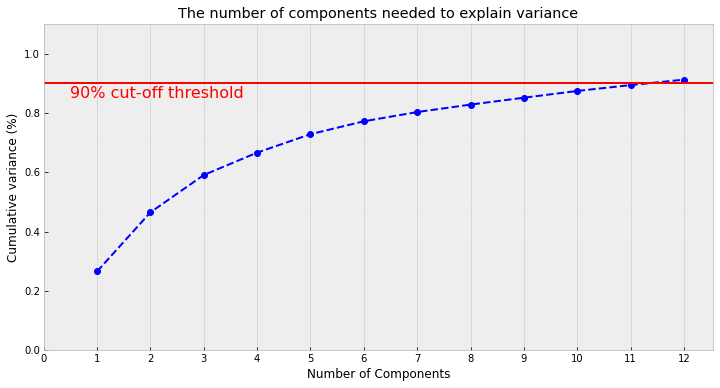

In [59]:
# % matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 13, step=1)   #  X_train_pca.shape =(60605, 12) thats why  1 am using 1 to 13
y = np.cumsum(pca_model.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 13, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

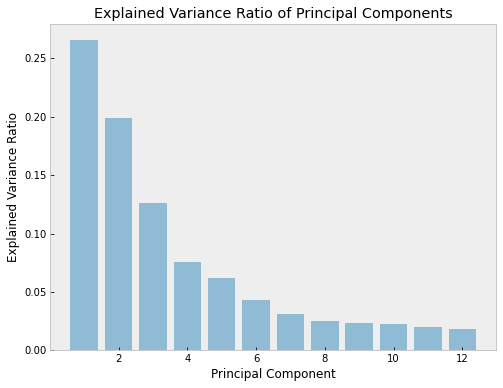

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# pca_model.plot(figsize=(10,8))
# plt.show()


# Plotting the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca_model.explained_variance_ratio_) + 1), pca_model.explained_variance_ratio_, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [61]:
explained_variance = pca_model.explained_variance_ratio_
singular_values = pca_model.singular_values_

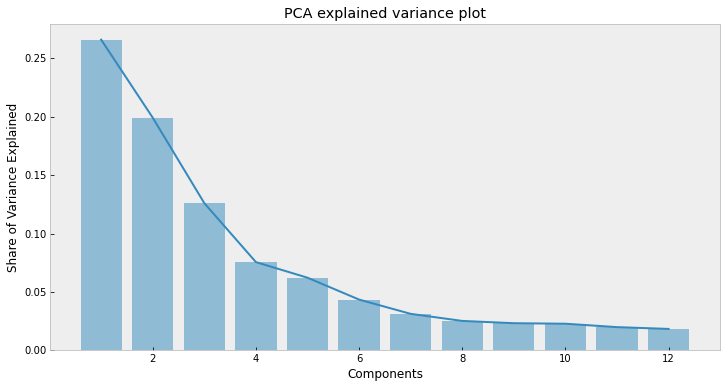

In [62]:
x = np.arange(1,len(explained_variance)+1)
plt.bar(range(1, len(pca_model.explained_variance_ratio_) + 1), pca_model.explained_variance_ratio_, alpha=0.5, align='center')

plt.plot(x, explained_variance)
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")
plt.show()


In [63]:
for i in range(0, 12):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 26.60% of variance
Component  1 accounts for 19.92% of variance
Component  2 accounts for 12.60% of variance
Component  3 accounts for 7.55% of variance
Component  4 accounts for 6.22% of variance
Component  5 accounts for 4.34% of variance
Component  6 accounts for 3.12% of variance
Component  7 accounts for 2.52% of variance
Component  8 accounts for 2.32% of variance
Component  9 accounts for 2.28% of variance
Component 10 accounts for 1.98% of variance
Component 11 accounts for 1.83% of variance


### Choosing the Optimal Number of Principal Components

When working with Principal Component Analysis (PCA) for dimensionality reduction, deciding the number of components is crucial. Here are some methods to determine the optimal number of principal components:

1. **Examining the Knee in Explained Variance Plot:**
   - In our dataset, the explained variance plot exhibits a noticeable "knee" around 4-6 principal components. This knee point can be indicative of the optimal number of components.

2. **Keeping Components Explaining Significant Variance:**
   - Another approach involves retaining components that account for more than 1% of the variance in the dataset. For our data, this threshold occurs after 11 components.

3. **Retaining Components with Cumulative Explained Variance:**
   - Considering the cumulative explained variance, it's beneficial to retain principal components that collectively cover a substantial portion of the total variance. For instance, keeping components that contribute to approximately 80% of the explained variance in the dataset. In our case, this would encompass the first 7 components.

These methods assist in striking a balance between computational efficiency and model performance by selecting an appropriate number of principal components for dimensionality reduction.


**From this PCA Components plot we can understadant that n_components= 12 will capture 90% of feature knowledges**

### LinearRegression model is trained after PCA

In [64]:
# Creating the final pipeline with  linear regression model
pipeline = Pipeline(steps=[('regressor', LinearRegression())])
pipeline.fit(X_train_pca, y_train)

# Evaluating the model
train_score = pipeline.score(X_train_pca, y_train)
test_score = pipeline.score(X_test_pca, y_test)

print(f"Training R^2 score: {train_score:.4f}")
print(f"Testing R^2 score: {test_score:.4f}")


Training R^2 score: 0.1669
Testing R^2 score: 0.1703


In [65]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = pipeline.predict(X_test_pca)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)


print(f" Mean Squared Error (MSE): {mse:.4f}")

 Mean Squared Error (MSE): 2841.2050


**So here I got R^2 score: 0.1703  and Mean Squared Error is 2841 which is very poor performance with simple linear regression.**

### PLOT THE DATA WITH 2 PCA COMPONENTS 

In [66]:
pca_2 = PCA(n_components=2, whiten=True) 
#fit the model to our data and extract the results
X_pca_2 = pca_2.fit_transform(X_train_transformed2)

In [67]:
df_pca_plot = pd.DataFrame(data = X_pca_2,
                 columns = ["Component 1", 
                            "Component 2"])

In [68]:
df_pca_plot["Component 1"]

0       -0.972568
1       -0.884896
2       -0.059776
3       -0.045234
4       -0.697619
           ...   
60600   -0.746157
60601   -0.460480
60602   -0.012080
60603    1.946435
60604   -0.188181
Name: Component 1, Length: 60605, dtype: float64

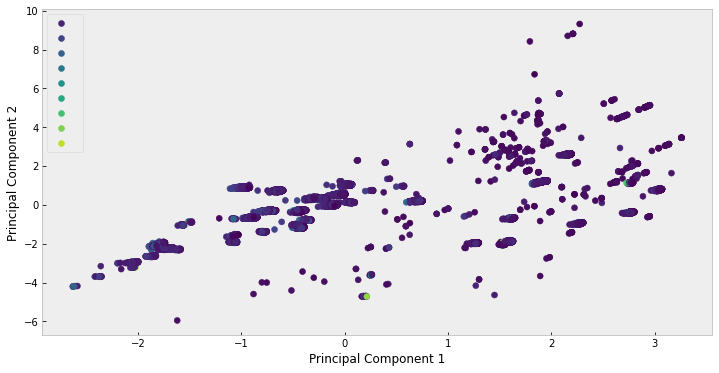

In [69]:
#plot the resulting data from two dimensions
plot = plt.scatter(df_pca_plot["Component 1"], df_pca_plot["Component 2"], c=y_train)
plt.legend(handles=plot.legend_elements()[0],)
plt.xlabel("Principal Component 1")  # Naming the x-axis
plt.ylabel("Principal Component 2")  # Naming the y-axis
plt.show()

## Plot  t-SNE on the PCA-transformed data

**Dimensionality reduction using PCA (Principal Component Analysis) followed by t-SNE (t-distributed Stochastic Neighbor Embedding) for visualizing the dataset in a 2D space.**

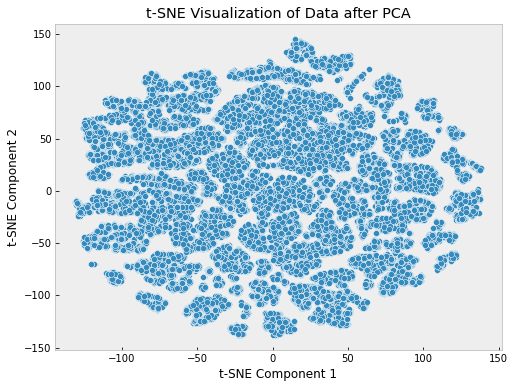

In [70]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA
pca_t = PCA(n_components=2)  # Choose the number of components
X_pca = pca_t.fit_transform(X_train_transformed2)

# Apply t-SNE on the PCA-transformed data
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plotting the data in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], palette='viridis')
plt.title('t-SNE Visualization of Data after PCA')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


It shows different similar data clusters but as I consider whole training dataset thats why its not able to show that properly. But if I use a smaill part of dataset it will shoe the cluesters properly.

# Building Pipeline

## Using Scikit-Learn's Pipeline for Machine Learning Workflows

Scikit-Learn provides a powerful tool called `Pipeline` that allows you to chain multiple steps together for a machine learning workflow. These steps can include preprocessing, feature selection, and model building.

### Benefits of Using Pipelines:

1. **Simplified Workflow:**
   - Pipelines allow you to combine several data processing steps into a single object, making it easier to manage and reproduce the workflow.

2. **Preventing Data Leakage:**
   - Pipelines help in avoiding data leakage by ensuring that preprocessing steps (e.g., scaling, imputation) are applied consistently to training and testing data.

3. **Cross-Validation Handling:**
   - It's simpler to perform cross-validation with a pipeline since transformations occur within each fold, preventing data leakage and ensuring a more accurate estimation of model performance.

In [71]:
energy_df_pipe = pd.read_csv("C:\\Users\\praba\\Desktop\\uca1\\M1\\ML\\final project\\data.csv\data.csv")
energy_df_pipe.tail(2)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
75755,6,State_11,Commercial,Commercial_Other,53575.0,2012.0,NaN,36.6,26,36.612903,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755
75756,6,State_11,Residential,2to4_Unit_Building,23888.0,1974.0,51.0,36.6,27,36.935484,...,16,0,0,0,NaN,NaN,NaN,NaN,29.154684,75756


In [72]:
X_1 = energy_df_pipe.drop(['site_eui'],axis=1)
y_1 = energy_df_pipe['site_eui']
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X_1, y_1 , random_state=42, test_size=0.2)

In [73]:
X_train_pipe.shape, y_test_pipe.shape

((60605, 63), (15152,))

**These drop_highly_correlated_columns I found after using coorelation matrix and setting thresold =90**


In [74]:
drop_highly_correlated_columns =['january_avg_temp', 'december_min_temp', 'august_avg_temp', 'july_avg_temp', 'january_min_temp', 'days_below_20F']

In [75]:
len(drop_highly_correlated_columns)

6

If a feature contains a vast majority of missing values (for instance, more than 40,000 null values in this case), one common approach is to consider dropping those features from the dataset.
**These 4 features contain more tahn 40000  Null Values.** 

In [76]:
drop_high_null_valued_column = ['direction_max_wind_speed','direction_peak_wind_speed','max_wind_speed','days_with_fog']

**all ids are unique so not relavent** 

In [77]:
drop_unique_id =['id']

**it's evident that the columns 'days_above_110F' and 'days_above_100F' and 'days_below_0F' predominantly contain zero values for most data points. so i am removing**

In [78]:
drop_ulrelated = ['days_above_110F', 'days_above_100F', 'days_below_0F']


#### Why I am removing those features are explained in data preprocessing step

In [79]:
drop_features_1= drop_highly_correlated_columns+drop_high_null_valued_column+drop_unique_id+drop_ulrelated
print(drop_features_1)
print(len(drop_features_1))


['january_avg_temp', 'december_min_temp', 'august_avg_temp', 'july_avg_temp', 'january_min_temp', 'days_below_20F', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'id', 'days_above_110F', 'days_above_100F', 'days_below_0F']
14


In [80]:
import pandas as pd

# Assuming energy_df_id_remove_2 is your DataFrame and features is a list of column names
features = X_1.columns.tolist()

Numerical_features_1 = [feature for feature in features if 
                X_1[feature].dtype != 'object' and 
                feature != 'Year_Factor']
categorical_features_1 = [feature for feature in features if
                X_1[feature].dtype == object or feature == 'Year_Factor' ]


print(len(Numerical_features_1))
# print("\n")

print(len(categorical_features_1))


59
4


In [81]:
# Numerical_features_1

In [82]:
# Numerical_features

In [83]:
categorical_features_1=['Year_Factor', 'State_Factor', 'building_class', 'facility_type']


In [84]:
common_elements_1 = list(set(Numerical_features_1) & set(drop_features_1))
print(common_elements_1)


['days_below_20F', 'december_min_temp', 'july_avg_temp', 'january_avg_temp', 'january_min_temp', 'days_below_0F', 'days_above_100F', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'days_above_110F', 'id', 'max_wind_speed', 'days_with_fog', 'august_avg_temp']


In [85]:
# Remove elements from list1 that are present in list2
Numerical_features_2 = [x for x in Numerical_features_1 if x not in common_elements_1]

print(len(Numerical_features_2)) 


45


In [86]:
common_elements_2 = list(set(Numerical_features_2) & set(drop_features_1))
print(common_elements_2)


[]


In [87]:
X_train_pipe.shape, X_test_pipe.shape, y_train_pipe.shape, y_test_pipe.shape

((60605, 63), (15152, 63), (60605,), (15152,))

In [88]:
common_elements = list(set(Numerical_features_2) & set(drop_features_1))
print(common_elements)


[]


In [89]:
"""This is the pipeline To drop specific columns """
drop_transformer = ColumnTransformer(transformers=[('drop_columns','drop',drop_features_1)],remainder='passthrough')

In [90]:
# drop_transformer = ColumnTransformer(transformers=[('drop_columns','drop',drop_features_1)],remainder='passthrough')

# Creating pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
#     ('outlier_removal', remove_outliers1(remove_outliers)),
    ('imputer', SimpleImputer(strategy='mean')) ,
    ('stdscaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
])

# Creating a ColumnTransformer to apply the appropriate pipeline to each type of feature
col_transformer = ColumnTransformer(transformers=[
   ('drop_columns','drop',drop_features_1),
    ('numerical', numerical_pipeline, Numerical_features_2),
    ('categorical', categorical_pipeline, categorical_features_1),
#     ('scale', StandardScaler())
],remainder='drop')


pipe = Pipeline(steps=[
    
#     ('drop_transformer',drop_transformer),
                 ('col_transformer',col_transformer),
    
    ('pca',PCA()),
]
                )





In [91]:
pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['january_avg_temp',
                                                   'december_min_temp',
                                                   'august_avg_temp',
                                                   'july_avg_temp',
                                                   'january_min_temp',
                                                   'days_below_20F',
                                                   'direction_max_wind_speed',
                                                   'direction_peak_wind_speed',
                                                   'max_wind_speed',
                                                   'days_with_fog', 'id',
                                                   'days_above_110F',
                                                   'days_above_100F',
                                                   'days_below_0F']),
                                                 ('n...
                                                   'august_max_temp',
                                                   'september_min_temp',
                                                   'september_avg_temp',
                                                   'september_max_temp',
                                                   'october_min_temp',
                                                   'october_avg_temp',
                                                   'october_max_temp', ...]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year_Factor',
                                                   'State_Factor',
                                                   'building_class',
                                                   'facility_type'])])),
                ('pca', PCA())])

### Optimizing Model Performance with Hyperparameter Tuning

In [92]:


# Initialze the estimators
clf1 = RandomForestRegressor()
clf2 = Lasso()

clf3 = LinearRegression()
clf4 = Ridge()
clf5 = ElasticNet()

clf6 = DecisionTreeRegressor()


In [93]:
# Initiaze the hyperparameters for each dictionary

#hyperparameters for RandomForestRegressor
param1 = {}
param1['regressor__n_estimators'] = [10,50]
param1['regressor__max_depth'] = [10,20]
param1['regressor'] = [clf1]

#hyperparameters for Lasso

param2 = {}
param2['regressor__alpha'] = [0.1, 1, 10]
param2['regressor'] = [clf2]

#hyperparameters for LinearRegression

param3 = {}
param3['regressor'] = [clf3]

#hyperparameters for Ridge

param4 = {}
param4['regressor__alpha'] = [0.1, 1]
param4['regressor'] = [clf4]

#hyperparameters for ElasticNet

param5 = {}
param5['regressor__alpha'] = [0.1, 1]
param5['regressor__l1_ratio'] = [0.2, 0.5, 0.7]
param5['regressor'] = [clf5]

#hyperparameters for DecisionTreeRegressor

param6 = {}
param6['regressor__max_depth'] = [3, 6]
param6['regressor'] = [clf6]


In [94]:
pipeline = Pipeline(steps=[('pipe',pipe),
                           ('regressor', clf1)])
params = [param1, param2, param3, param4, param5,param6]
# params = [param1, param2, param3]


In [95]:
pipeline

Pipeline(steps=[('pipe',
                 Pipeline(steps=[('col_transformer',
                                  ColumnTransformer(transformers=[('drop_columns',
                                                                   'drop',
                                                                   ['january_avg_temp',
                                                                    'december_min_temp',
                                                                    'august_avg_temp',
                                                                    'july_avg_temp',
                                                                    'january_min_temp',
                                                                    'days_below_20F',
                                                                    'direction_max_wind_speed',
                                                                    'direction_peak_wind_speed',
                                                                    'max_wind_speed',
                                                                    'days_with_fog',
                                                                    'id',
                                                                    'days_above_110F',
                                                                    'days_above_100...
                                                                    'september_avg_temp',
                                                                    'september_max_temp',
                                                                    'october_min_temp',
                                                                    'october_avg_temp',
                                                                    'october_max_temp', ...]),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Year_Factor',
                                                                    'State_Factor',
                                                                    'building_class',
                                                                    'facility_type'])])),
                                 ('pca', PCA())])),
                ('regressor', RandomForestRegressor())])

In [96]:
# Gridsearchcv is used
# %%time

gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=3,error_score='raise')


In [97]:
# X_train_pipe

In [98]:
%%time

gs_fit = gs.fit(X_train_pipe, y_train_pipe)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Wall time: 39min 18s


In [99]:
gs

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('pipe',
                                        Pipeline(steps=[('col_transformer',
                                                         ColumnTransformer(transformers=[('drop_columns',
                                                                                          'drop',
                                                                                          ['january_avg_temp',
                                                                                           'december_min_temp',
                                                                                           'august_avg_temp',
                                                                                           'july_avg_temp',
                                                                                           'january_min_temp',
                                                                                           'days_below_20F',
                                                                                           'direction_max_wind_speed',
                                                                                           'direction_peak_wind_speed',
                                                                                           'max_wind_speed',
                                                                                           'days_...
                         {'regressor': [Lasso()],
                          'regressor__alpha': [0.1, 1, 10]},
                         {'regressor': [LinearRegression()]},
                         {'regressor': [Ridge()], 'regressor__alpha': [0.1, 1]},
                         {'regressor': [ElasticNet()],
                          'regressor__alpha': [0.1, 1],
                          'regressor__l1_ratio': [0.2, 0.5, 0.7]},
                         {'regressor': [DecisionTreeRegressor()],
                          'regressor__max_depth': [3, 6]}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [100]:
gs.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': 20,
 'regressor__n_estimators': 50}

In [101]:
gs.score(X_test_pipe,y_test_pipe)

-45.5826269100602

In [102]:
pred_y = gs.predict(X_test_pipe)


In [103]:
r2_score(y_test_pipe,pred_y)

0.39326328913683184

### So After using Gridsearch I found that RandomForestRegressor is the best model with max_depth 20 and n_estimators 50 which shows R2 score 0.3932 and RSME is 45.

To enhance the RandomForestRegressor model's performance, consider tuning hyperparameters such as `max_depth` and `n_estimators`.

- **`max_depth`:** Determines the maximum depth of each tree in the forest. Higher values can lead to overfitting, so finding an optimal depth is crucial for balancing model complexity.

- **`n_estimators`:** Defines the number of trees in the forest. While increasing this parameter can enhance performance, excessively high values might not significantly improve results and can increase computational load.

**So i should use more number max_depth and n_estimators to improve my model performance.But its taking too much time tahts why I have used only 20 as max_debth and n_estimators as 50.**

In [104]:
"""This is the pipeline To drop specific columns """
drop_transformer = ColumnTransformer(transformers=[('drop_columns','drop',drop_features_1)],remainder='passthrough')

In [105]:
# drop_transformer = ColumnTransformer(transformers=[('drop_columns','drop',drop_features_1)],remainder='passthrough')

# Creating pipelines for numerical and categorical features
numerical_pipeline = Pipeline(steps=[
#     ('outlier_removal', remove_outliers1(remove_outliers)),
    ('imputer', SimpleImputer(strategy='mean')) ,
    ('stdscaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Filling missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
])

# Creating a ColumnTransformer to apply the appropriate pipeline to each type of feature
col_transformer = ColumnTransformer(transformers=[
   ('drop_columns','drop',drop_features_1),
    ('numerical', numerical_pipeline, Numerical_features_2),
    ('categorical', categorical_pipeline, categorical_features_1),
#     ('scale', StandardScaler())
],remainder='drop')


pipe_2pp = Pipeline(steps=[
    
#     ('drop_transformer',drop_transformer),
                 ('col_transformer',col_transformer),
    
#     ('pca',PCA()),
]
                )





In [106]:
pipe_2pp

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['january_avg_temp',
                                                   'december_min_temp',
                                                   'august_avg_temp',
                                                   'july_avg_temp',
                                                   'january_min_temp',
                                                   'days_below_20F',
                                                   'direction_max_wind_speed',
                                                   'direction_peak_wind_speed',
                                                   'max_wind_speed',
                                                   'days_with_fog', 'id',
                                                   'days_above_110F',
                                                   'days_above_100F',
                                                   'days_below_0F']),
                                                 ('n...
                                                   'august_min_temp',
                                                   'august_max_temp',
                                                   'september_min_temp',
                                                   'september_avg_temp',
                                                   'september_max_temp',
                                                   'october_min_temp',
                                                   'october_avg_temp',
                                                   'october_max_temp', ...]),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year_Factor',
                                                   'State_Factor',
                                                   'building_class',
                                                   'facility_type'])]))])

In [107]:


# Initialze the estimators
clf1 = RandomForestRegressor()
clf2 = Lasso()

clf3 = LinearRegression()
clf4 = Ridge()
clf5 = ElasticNet()

clf6 = DecisionTreeRegressor()


In [108]:
# Initiaze the hyperparameters for each dictionary

#hyperparameters for RandomForestRegressor
param1 = {}
param1['regressor__n_estimators'] = [10,250]
param1['regressor__max_depth'] = [15,50]
param1['regressor'] = [clf1]

#hyperparameters for Lasso

param2 = {}
param2['regressor__alpha'] = [0.1, 1, 10]
param2['regressor'] = [clf2]

#hyperparameters for LinearRegression

param3 = {}
param3['regressor'] = [clf3]

#hyperparameters for Ridge

param4 = {}
param4['regressor__alpha'] = [0.1, 1]
param4['regressor'] = [clf4]

#hyperparameters for ElasticNet

param5 = {}
param5['regressor__alpha'] = [0.1, 1]
param5['regressor__l1_ratio'] = [0.2, 0.5, 0.7]
param5['regressor'] = [clf5]

#hyperparameters for DecisionTreeRegressor

param6 = {}
param6['regressor__max_depth'] = [3, 6]
param6['regressor'] = [clf6]


In [109]:
pipeline = Pipeline(steps=[('pipe_2pp',pipe_2pp),
                           ('regressor', clf1)])
params = [param1, param2, param3, param4, param5,param6]
# params = [param1]


In [110]:
pipeline

Pipeline(steps=[('pipe_2pp',
                 Pipeline(steps=[('col_transformer',
                                  ColumnTransformer(transformers=[('drop_columns',
                                                                   'drop',
                                                                   ['january_avg_temp',
                                                                    'december_min_temp',
                                                                    'august_avg_temp',
                                                                    'july_avg_temp',
                                                                    'january_min_temp',
                                                                    'days_below_20F',
                                                                    'direction_max_wind_speed',
                                                                    'direction_peak_wind_speed',
                                                                    'max_wind_speed',
                                                                    'days_with_fog',
                                                                    'id',
                                                                    'days_above_110F',
                                                                    'days_above...
                                                                    'september_avg_temp',
                                                                    'september_max_temp',
                                                                    'october_min_temp',
                                                                    'october_avg_temp',
                                                                    'october_max_temp', ...]),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('onehot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Year_Factor',
                                                                    'State_Factor',
                                                                    'building_class',
                                                                    'facility_type'])]))])),
                ('regressor', RandomForestRegressor())])

In [111]:
# Gridsearchcv is used
# %%time

gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=3,error_score='raise')


In [112]:
%%time

gs_fit = gs.fit(X_train_pipe, y_train_pipe)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Wall time: 23min 10s


In [113]:
gs

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('pipe_2pp',
                                        Pipeline(steps=[('col_transformer',
                                                         ColumnTransformer(transformers=[('drop_columns',
                                                                                          'drop',
                                                                                          ['january_avg_temp',
                                                                                           'december_min_temp',
                                                                                           'august_avg_temp',
                                                                                           'july_avg_temp',
                                                                                           'january_min_temp',
                                                                                           'days_below_20F',
                                                                                           'direction_max_wind_speed',
                                                                                           'direction_peak_wind_speed',
                                                                                           'max_wind_speed',
                                                                                           'd...
                         {'regressor': [Lasso()],
                          'regressor__alpha': [0.1, 1, 10]},
                         {'regressor': [LinearRegression()]},
                         {'regressor': [Ridge()], 'regressor__alpha': [0.1, 1]},
                         {'regressor': [ElasticNet()],
                          'regressor__alpha': [0.1, 1],
                          'regressor__l1_ratio': [0.2, 0.5, 0.7]},
                         {'regressor': [DecisionTreeRegressor()],
                          'regressor__max_depth': [3, 6]}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [114]:
gs.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': 50,
 'regressor__n_estimators': 250}

In [115]:
gs.score(X_test_pipe,y_test_pipe)

-39.079590384160426

In [116]:
pred_y = gs.predict(X_test_pipe)


In [117]:
r2_score(y_test_pipe,pred_y)

0.5540341751077098

### So After using Gridsearch I found that RandomForestRegressor is the best model with max_depth 50 and n_estimators 250 which shows R2 score 0.5530 and RMSE is 39.0  [with out PCA]

## As without PCA the RMSE reduced from 45 to 39 and the speed of the model training in improved. So without PCA my model works better.